# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---


# ISOTERMA DE 20°C DE LA BOYA UBICADA EN 0°N - 170°W

---

In [18]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/BOYA 0N170W/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
isot_20 = xr.open_dataset(path + 'iso0n170w_dy.cdf',drop_variables=['QI_5006'])
isot_20['time'] = pd.date_range('1992-02-20', '2023-07-10', freq = 'D')
# Elimina las dimensiones que no deseas (lat y lon)
isot_20 = isot_20.sel(lat=isot_20.lat, lon=isot_20.lon, method='nearest')
isot_20 = isot_20.squeeze(drop=True)
isot_20

<xarray.Dataset>
Dimensions:  (time: 11464)
Coordinates:
  * time     (time) datetime64[ns] 1992-02-20 1992-02-21 ... 2023-07-10
Data variables:
    ISO_6    (time) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

In [21]:
# Calculamos el promedio histórico (climatología) y pasamos a dataframe:
isot_20_prom = isot_20.sel(time=slice('1991-01-01', '2020-12-31')).groupby('time.dayofyear').mean(dim='time')
df_clim = isot_20_prom.to_dataframe().drop(366, axis=0).reset_index().drop(['dayofyear'],axis=1)
df_clim = df_clim.rename(columns={'ISO_6':'ISO_6_clim'})
df_clim_dup = np.tile(df_clim['ISO_6_clim'], 2) # Duplicamos
df_clim_dup = pd.DataFrame({'ISO_6_clim': df_clim_dup})
df_clim_dup

,ISO_6_clim
0,163.828842
1,165.480515
2,166.354935
3,166.475296
4,167.952560
...,...
725,164.225983
726,165.005859
727,163.754059
728,164.605286


In [22]:
round(df_clim.describe().loc[['max', 'min', 'mean', 'std']],2)

,ISO_6_clim
max,167.95
min,145.23
mean,155.89
std,5.10


In [23]:
dfs = []
years = [1997,1998,2010,2011,2022,2023]
for year in years:
  isot_20_year = isot_20.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
  df_year = isot_20_year.to_dataframe().reset_index().drop(['time'],axis=1)
  df_year = df_year.rename(columns={'ISO_6':f'ISO_6_{year}'})
  dfs.append(df_year)
# Combinar todos los dataframes en uno solo
df = pd.concat(dfs, axis=1)
df

,ISO_6_1997,ISO_6_1998,ISO_6_2010,ISO_6_2011,ISO_6_2022,ISO_6_2023
0,183.680099,115.532547,148.733414,151.628571,187.734512,175.485229
1,183.944366,124.242409,147.246368,152.599991,191.439117,176.098190
2,181.589676,125.887100,147.653839,150.310349,194.824844,177.024689
3,181.925919,122.560966,146.662308,149.053619,201.982376,177.343658
4,199.553589,118.257263,147.204773,NaN,193.727188,181.131042
...,...,...,...,...,...,...
360,113.323341,152.553192,152.763153,NaN,176.664703,NaN
361,113.567070,158.579895,NaN,153.528229,177.850281,NaN
362,113.764038,155.674530,149.264709,157.127655,172.816620,NaN
363,115.919289,149.193542,152.388885,162.156448,172.645203,NaN


In [24]:
round(df.describe().loc[['max', 'min', 'mean', 'std']],2)

,ISO_6_1997,ISO_6_1998,ISO_6_2010,ISO_6_2011,ISO_6_2022,ISO_6_2023
max,221.49,169.86,184.68,183.63,205.53,203.52
min,103.68,86.62,102.49,137.85,132.91,143.62
mean,160.37,114.10,141.26,164.49,165.83,176.63
std,25.13,15.34,14.87,9.72,13.42,9.83


In [25]:
# Crear una lista para almacenar los resultados
dfss = pd.DataFrame()
# Iterar sobre los años y realizar la concatenación correspondiente
for i in range(0, len(years), 2):
    col1 = 'ISO_6_' + str(years[i])
    col2 = 'ISO_6_' + str(years[i+1])
    combined_col_name = col1 + '-' + str(years[i+1])
    result = pd.concat([df[col1], df[col2]]).reset_index(drop=True)
    dfss[combined_col_name] = result
dfss.insert(loc=0, column='ISO_6_clim', value=df_clim_dup)
dfss

,ISO_6_clim,ISO_6_1997-1998,ISO_6_2010-2011,ISO_6_2022-2023
0,163.828842,183.680099,148.733414,187.734512
1,165.480515,183.944366,147.246368,191.439117
2,166.354935,181.589676,147.653839,194.824844
3,166.475296,181.925919,146.662308,201.982376
4,167.952560,199.553589,147.204773,193.727188
...,...,...,...,...
725,164.225983,152.553192,NaN,NaN
726,165.005859,158.579895,153.528229,NaN
727,163.754059,155.674530,157.127655,NaN
728,164.605286,149.193542,162.156448,NaN


In [26]:
import matplotlib.dates as mdates
def ISOT20_vs_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  barras = ax.bar(data.index,data.ISO_6_clim, color ='lightsteelblue', label = 'Prom. Histórico',zorder = 0,width = 1)
  barras = ax.plot(data.index,data[data.columns[i]],color ='tomato', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)
  #-----------------------------------------------------------------------------------------
  # # Invertir el eje Y
  ax.set_ylim(80, 230)
  ax.set_yticks(range(80, 240, 10))
  ax.invert_yaxis()

  #-----------------------------------------------------------------------------------------
    # ESTILO :V
  # Agregar el nombre del año al título
  ax.set_title(f'Isoterma de 20°C: Histórico (1991-2020) vs {year}\nBoya: 0°N-170°W',  style="oblique", fontsize=10, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='gainsboro', linestyle='--',alpha=0.5)
  ax.legend(prop={'style': 'oblique'},loc='best', fontsize=8, labelcolor='black')
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(style="oblique", fontsize=8)
  plt.yticks(style="oblique", fontsize=8)
  ax.set_ylabel('Depth [m]',  style="oblique",fontsize=10)

  plt.text(0, -0.20, 'Fuente de datos: NOAA [TAO/TRITON]',  style="oblique", fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  #-----------------------------------------------------------------------------------------
  # ax.legend(loc='best', bbox_to_anchor=(1, 0.15), fontsize=11, labelcolor='black')
  fig.savefig(path + f'ISOT20_histVS{year}.jpg',
                  transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

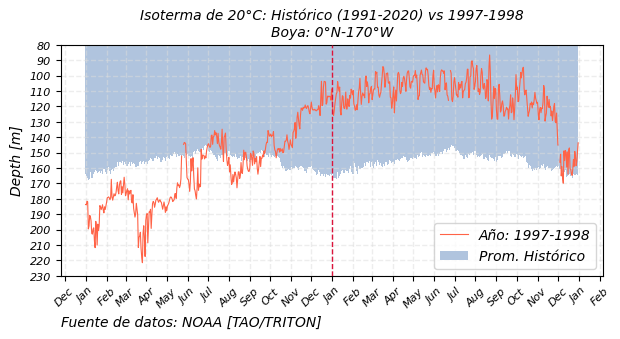

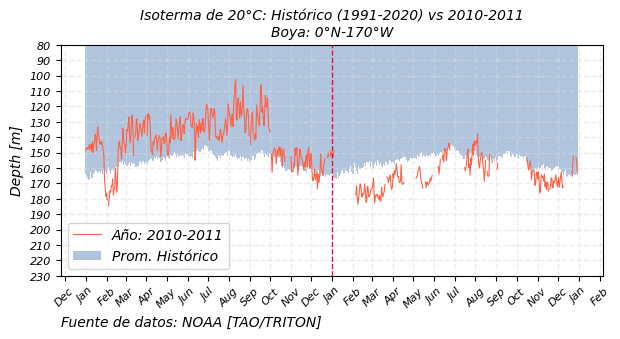

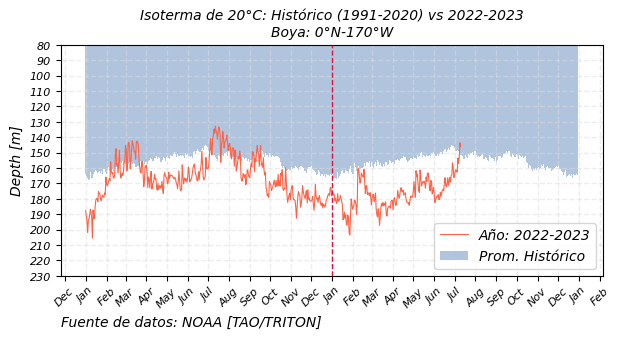

In [27]:
for i in range(1,len(dfss.columns)):
  ISOT20_vs_year(dfss,dfss.columns[i].split("ISO_6_")[1])

# ANOMALÍAS

In [28]:
isot_20_prom = isot_20.sel(time=slice('1991-01-01', '2020-12-31')).groupby('time.dayofyear').mean(dim='time')
isot_20_anom = isot_20.groupby('time.dayofyear') - isot_20_prom
isot_20_anom

<xarray.Dataset>
Dimensions:    (time: 11464)
Coordinates:
  * time       (time) datetime64[ns] 1992-02-20 1992-02-21 ... 2023-07-10
    dayofyear  (time) int64 51 52 53 54 55 56 57 ... 185 186 187 188 189 190 191
Data variables:
    ISO_6      (time) float32 -32.42 -34.15 nan nan ... 8.196 2.442 -7.87 -5.446

In [29]:
dfs_anom = []
for year in years:
  isot_20_year_anom = isot_20_anom.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
  df_year_anom = isot_20_year_anom.to_dataframe().reset_index().drop(['time','dayofyear'],axis=1)
  df_year_anom = df_year_anom.rename(columns={'ISO_6':f'ISO_6_Anom_{year}'})
  dfs_anom.append(df_year_anom)
# Combinar todos los dataframes en uno solo
df_Anom = pd.concat(dfs_anom, axis=1)
df_Anom

,ISO_6_Anom_1997,ISO_6_Anom_1998,ISO_6_Anom_2010,ISO_6_Anom_2011,ISO_6_Anom_2022,ISO_6_Anom_2023
0,19.851257,-48.296295,-15.095428,-12.200272,23.905670,11.656387
1,18.463852,-41.238106,-18.234146,-12.880524,25.958603,10.617676
2,15.234741,-40.467834,-18.701096,-16.044586,28.469910,10.669754
3,15.450623,-43.914330,-19.812988,-17.421677,35.507080,10.868362
4,31.601028,-49.695297,-20.747787,NaN,25.774628,13.178482
...,...,...,...,...,...,...
360,-50.902641,-11.672791,-11.462830,NaN,12.438721,NaN
361,-51.438789,-6.425964,NaN,-11.477631,12.844421,NaN
362,-49.990021,-8.079529,-14.489349,-6.626404,9.062561,NaN
363,-48.685997,-15.411743,-12.216400,-2.448837,8.039917,NaN


In [30]:
round(df_Anom.describe().loc[['max', 'min', 'mean', 'std']],2)

,ISO_6_Anom_1997,ISO_6_Anom_1998,ISO_6_Anom_2010,ISO_6_Anom_2011,ISO_6_Anom_2022,ISO_6_Anom_2023
max,65.14,5.52,25.51,26.12,39.20,42.69
min,-61.89,-65.17,-48.47,-17.42,-19.76,-7.87
mean,4.45,-41.82,-14.41,8.36,9.94,21.09
std,25.97,13.05,12.15,8.77,11.20,8.18


In [31]:
# Crear una lista para almacenar los resultados
dfss_Anom = pd.DataFrame()
# Iterar sobre los años y realizar la concatenación correspondiente
for i in range(0, len(years), 2):
    col1 = 'ISO_6_Anom_' + str(years[i])
    col2 = 'ISO_6_Anom_' + str(years[i+1])
    combined_col_name = col1 + '-' + str(years[i+1])
    result = pd.concat([df_Anom[col1], df_Anom[col2]]).reset_index(drop=True)
    dfss_Anom[combined_col_name] = result
dfss_Anom

,ISO_6_Anom_1997-1998,ISO_6_Anom_2010-2011,ISO_6_Anom_2022-2023
0,19.851257,-15.095428,23.905670
1,18.463852,-18.234146,25.958603
2,15.234741,-18.701096,28.469910
3,15.450623,-19.812988,35.507080
4,31.601028,-20.747787,25.774628
...,...,...,...
725,-11.672791,NaN,NaN
726,-6.425964,-11.477631,NaN
727,-8.079529,-6.626404,NaN
728,-15.411743,-2.448837,NaN


In [32]:
def ISOT20_Anom_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  barras = ax.plot(data.index,data[data.columns[i]],color ='cornflowerblue', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)
  ax.set_ylabel('Depth [m]',  style="oblique",fontsize=10)
  # #-----------------------------------------------------------------------------------------
    # ESTILO :V
  # Agregar el nombre del mes al título
  ax.set_title(f'Anomalías de Isoterma 20°C: Año {year}\nBoya: 0°N-170°W',  style="oblique", fontsize=10, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='silver', linestyle='--',alpha=0.5)
  plt.axhline(y=0, color='red', linestyle='-',linewidth=0.8)
  ax.set_ylim(-70, 70)
  ax.set_yticks(range(-70, 80, 10))
  ax.invert_yaxis()

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(style="oblique", fontsize=8)
  plt.yticks(style="oblique", fontsize=8)

  plt.text(0, -0.20, 'Fuente de datos: NOAA [TAO/TRITON]',  style="oblique", fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  # #-----------------------------------------------------------------------------------------
  # # ax.legend(loc='best', bbox_to_anchor=(1.35, 0.11), fontsize=11, labelcolor='black')
  fig.savefig(path + f'ISOT20_Anom{year}.jpg',
                  transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

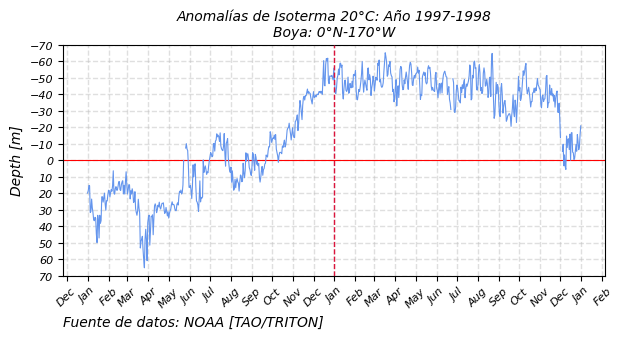

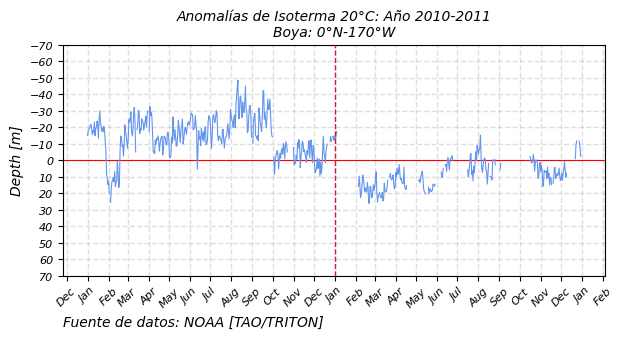

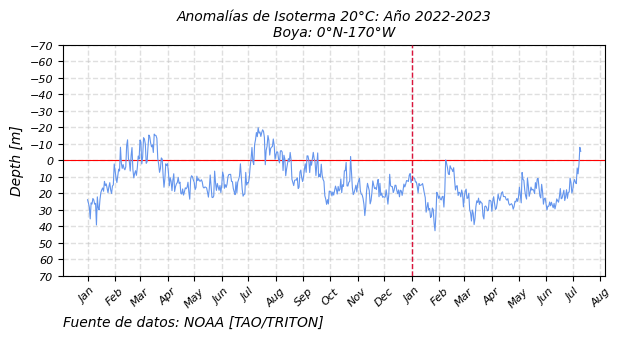

In [33]:
for i in range(0,len(dfss_Anom.columns)):
  ISOT20_Anom_year(dfss_Anom,dfss_Anom.columns[i].split("ISO_6_Anom_")[1])


---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---